In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

In [2]:
root_dir = './'
local_path_soil = '/bd_mir_solo_without_xy.csv'
file_path_soil = root_dir + local_path_soil

df_soil = pd.read_csv(file_path_soil)

## Load train data

In [3]:
df_soil.shape[0]

540

In [4]:
df_soil_argissolo = df_soil.where(df_soil['Ordem.SIBCS'] =='Argissolo').dropna(axis = 0)

In [5]:
df_soil_argissolo_data = df_soil_argissolo.drop(['ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_argissolo_target = pd.DataFrame(df_soil_argissolo, columns=['Carbon_gkg'])

## Load test data

In [6]:
df_soil_test = pd.read_csv('./bd_mir_solo_test_without_xy.csv')

In [7]:
df_soil_test_data = df_soil_test.drop(['ID','ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_test_target = pd.DataFrame(df_soil_test, columns=['Carbon_gkg'])

In [8]:
df_soil_test_argissolo = df_soil_test.where(df_soil_test['Ordem.SIBCS'] =='Argissolo').dropna(axis = 0)
df_soil_test_argissolo_data = df_soil_test_argissolo.drop(['ID','ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_test_argissolo_data = df_soil_test_argissolo_data.apply(lambda x:np.log(1/x))
df_soil_test_argissolo_target = pd.DataFrame(df_soil_test_argissolo, columns=['Carbon_gkg'])

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_soil_test_argissolo_data)
df_soil_test_argissolo_data_tr = pd.DataFrame(X,columns=df_soil_test_argissolo_data.columns)

## Model 1

In [10]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

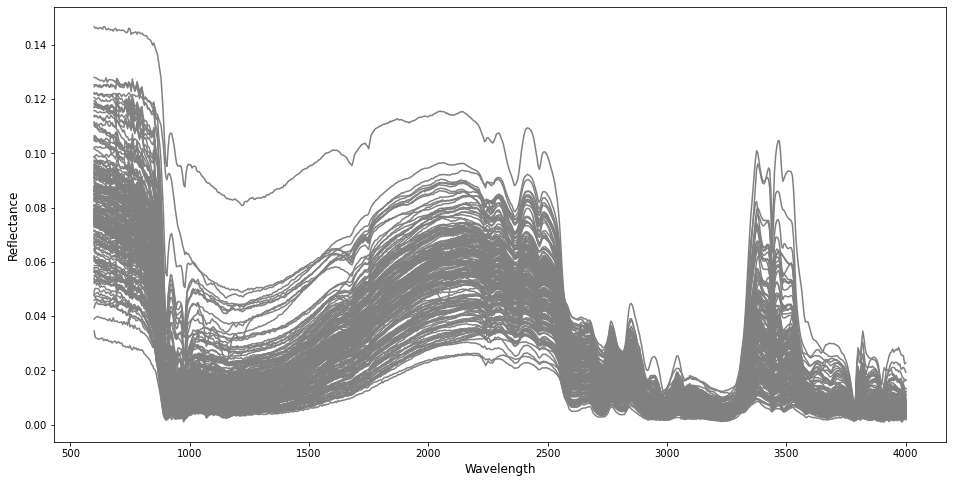

In [11]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_argissolo_data)):
    
    test_row = df_soil_argissolo_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [12]:
#Converting data from reflectance values to absorbance values
from math import log, exp

In [13]:
df_soil_argissolo_data = df_soil_argissolo_data.apply(lambda x:np.log(1/x))

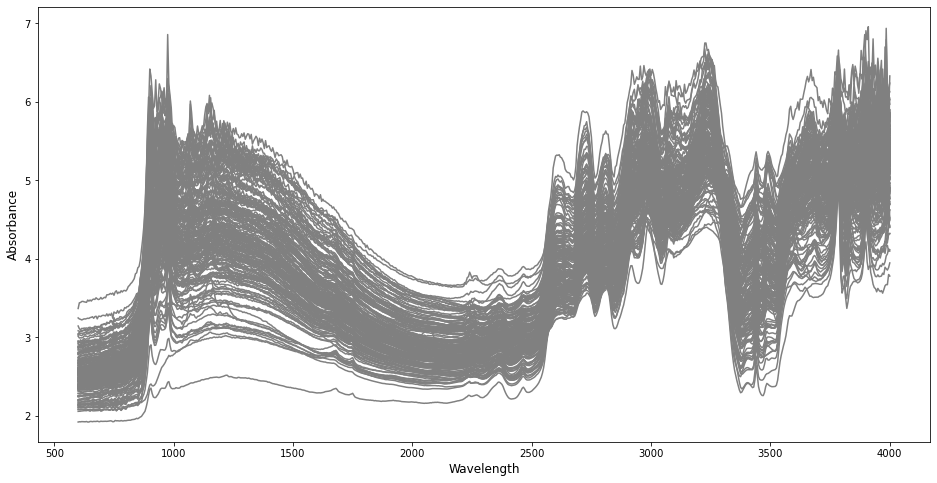

In [14]:
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_argissolo_data)):
    
    test_row = df_soil_argissolo_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [15]:
#Savitzky-Golay Filtering
import scipy
from scipy import signal

In [16]:
v = scipy.signal.savgol_filter(df_soil_argissolo_data,21,3)
for i in range(len(df_soil_argissolo_data)):
    for j in range(len(df_soil_argissolo_data.iloc[i])):
        df_soil_argissolo_data.iloc[i][j] = v[i][j]

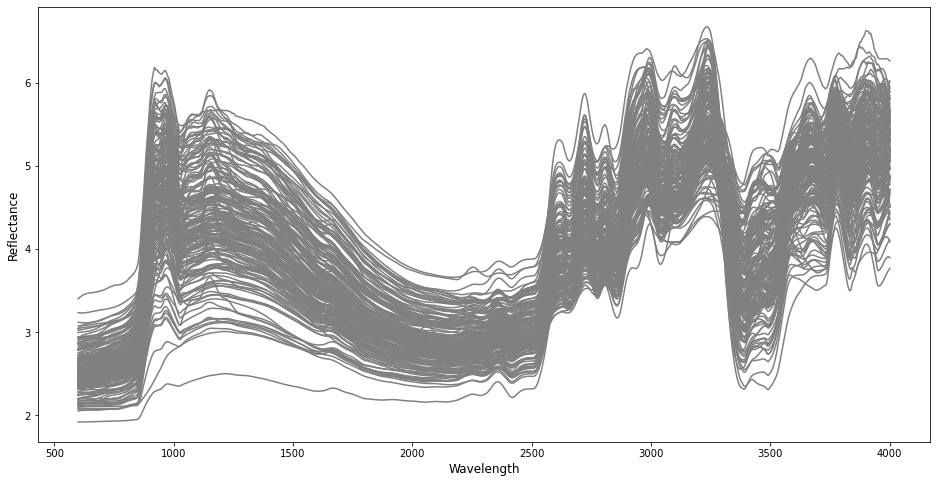

In [17]:
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_argissolo_data)):
    
    test_row = df_soil_argissolo_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [18]:
# Standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

In [19]:
X = pipeline.fit_transform(df_soil_argissolo_data)
df_soil_argissolo_data_tr = pd.DataFrame(X,columns=df_soil_argissolo_data.columns)
df_soil_argissolo_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.566246,-0.558603,-0.551735,-0.545541,-0.539916,-0.534751,-0.529934,-0.525353,-0.520898,-0.516456,...,0.091104,0.125912,0.167697,0.214691,0.265100,0.316871,0.367303,0.412428,0.446172,0.459767
1,-0.556215,-0.555770,-0.555745,-0.556115,-0.556845,-0.557898,-0.559229,-0.560791,-0.562537,-0.564415,...,-0.139928,-0.128037,-0.103508,-0.063159,-0.003045,0.081723,0.197007,0.349088,0.542721,0.776591
2,0.940983,0.945224,0.949605,0.954128,0.958779,0.963533,0.968355,0.973204,0.978034,0.982794,...,1.021948,1.042052,1.064263,1.086924,1.108018,1.124759,1.132960,1.126116,1.094423,1.024804
3,0.327641,0.340974,0.351799,0.360472,0.367334,0.372710,0.376917,0.380263,0.383051,0.385576,...,0.944409,0.874316,0.796515,0.712176,0.622211,0.527304,0.428012,0.325065,0.220037,0.116581
4,0.238922,0.260943,0.279970,0.296431,0.310736,0.323280,0.334447,0.344608,0.354128,0.363362,...,0.923951,0.923012,0.914499,0.895735,0.863304,0.812684,0.737805,0.630778,0.482445,0.285169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.003831,0.009520,0.014791,0.019692,0.024270,0.028567,0.032627,0.036489,0.040191,0.043771,...,0.783210,0.861965,0.944248,1.028476,1.112749,1.194374,1.269028,1.329410,1.363478,1.353345
176,0.297760,0.293572,0.290936,0.289643,0.289483,0.290248,0.291731,0.293727,0.296031,0.298438,...,0.915245,0.832982,0.742474,0.645108,0.542038,0.434265,0.322828,0.209251,0.096416,-0.010053
177,0.607477,0.631643,0.651038,0.666259,0.677876,0.686434,0.692459,0.696464,0.698950,0.700407,...,1.147610,1.187741,1.231744,1.279309,1.329919,1.382452,1.434445,1.480833,1.512106,1.512724
178,0.838336,0.837371,0.837164,0.837636,0.838696,0.840247,0.842185,0.844402,0.846787,0.849227,...,1.600000,1.517448,1.430688,1.340600,1.247750,1.152267,1.053672,0.950724,0.841461,0.723935


In [20]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [119]:
scores = []
ne = [1,100,500,800,1000]
for n in ne:
    forest_reg_argissolo = RandomForestRegressor(n_estimators=n)
    score = cross_val_score(forest_reg_argissolo,df_soil_argissolo_data_tr,df_soil_argissolo_target,cv=5)
    score = score.mean()
    scores.append(score)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

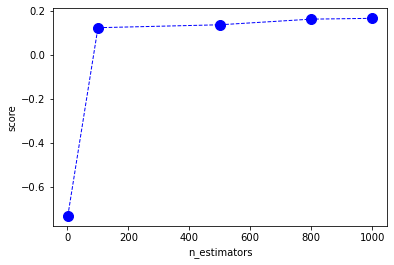

[-0.7312659092852115,
 0.12419924457861069,
 0.13743249070631852,
 0.16304414338868414,
 0.16672099108564725]

In [120]:
plt.plot(ne,scores,'bo',linestyle = 'dashed', linewidth = 1, markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()
scores

In [121]:
forest_reg_argissolo = RandomForestRegressor(n_estimators=1000)
forest_reg_argissolo.fit(df_soil_argissolo_data_tr, df_soil_argissolo_target)

<ipython-input-121-1eb761fa23df>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg_argissolo.fit(df_soil_argissolo_data_tr, df_soil_argissolo_target)


RandomForestRegressor(n_estimators=1000)

In [21]:
import joblib
from sklearn.metrics import r2_score

In [122]:
Y = forest_reg_argissolo.predict(df_soil_test_argissolo_data_tr)
m = mean_squared_error(df_soil_test_argissolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_argissolo_target, Y)))

root_mean_squared_error: 5.205371058294568
R2: 0.06071550388304492


In [123]:
joblib.dump(forest_reg_argissolo, './model/argissolo/forest_reg_argissolo.pkl')

['./model/argissolo/forest_reg_argissolo.pkl']

D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

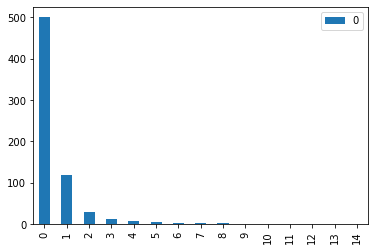

In [67]:
#PCA
df_soil_argissolo_data_tr_ = df_soil_argissolo_data_tr
ew_argissolo, ev_argissolo = np.linalg.eig(np.cov(df_soil_argissolo_data_tr_.T))
ew_argissolo_order = np.argsort(ew_argissolo)[::-1]
ew_argissolo_sort = ew_argissolo[ew_argissolo_order]
ev_argissolo_sort = ev_argissolo[:,ew_argissolo_order]
pd.DataFrame(ew_argissolo_sort[0:15]).plot(kind='bar')

In [90]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [115]:
pca_argissolo = PCA(n_components=28)
pca_argissolo.fit(df_soil_argissolo_data_tr)
df_soil_argissolo_data_tr_pca = pca_argissolo.transform(df_soil_argissolo_data_tr)

ols_argissolo = linear_model.LinearRegression()
ols_argissolo.fit(df_soil_argissolo_data_tr_pca, df_soil_argissolo_target)

LinearRegression()

In [116]:
df_soil_test_argissolo_data_tr_pca = pca_argissolo.transform(df_soil_test_argissolo_data_tr)
Y = ols_argissolo.predict(df_soil_test_argissolo_data_tr_pca)
m = mean_squared_error(df_soil_test_argissolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_argissolo_target, Y)))

root_mean_squared_error: 4.253155681819258
R2: 0.37292956179924197


In [117]:
joblib.dump(ols_argissolo, './model/argissolo/ols_argissolo.pkl')

['./model/argissolo/ols_argissolo.pkl']

In [118]:
joblib.dump(pca_argissolo, './model/argissolo/pca_argissolo.pkl')

['./model/argissolo/pca_argissolo.pkl']

In [70]:
#PLSR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [87]:
pls_model_argissolo_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1, 5)}
gsearch = GridSearchCV(pls_model_argissolo_setup, param_grid)
pls_model_argissolo = gsearch.fit(df_soil_argissolo_data_tr, df_soil_argissolo_target)

In [88]:
Y = pls_model_argissolo.predict(df_soil_test_argissolo_data_tr)
m = mean_squared_error(df_soil_test_argissolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_argissolo_target, Y)))

root_mean_squared_error: 4.2966362285291515
R2: 0.36004278493848574


In [89]:
joblib.dump(pls_model_argissolo, './model/argissolo/pls_model_argissolo.pkl')

['./model/argissolo/pls_model_argissolo.pkl']

In [22]:
es = joblib.load('./model/total/forest_total.pkl')

In [23]:
Y = es.predict(df_soil_test_argissolo_data_tr)
m = mean_squared_error(df_soil_test_argissolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_argissolo_target, Y)))

root_mean_squared_error: 9.101355070981365
R2: -1.87148057942487
